In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/fashion", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


In [6]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


5


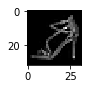

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [8]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
# 将序列的所有元素随机排序。

In [9]:
import tensorflow as tf

EPOCHS = 10
#要经过10轮的随机训练
#一轮随机训练为训练数/批量尺寸
BATCH_SIZE = 128
#一次训练需要的样本数

In [10]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1' : 6,
        'layer_2' : 16,
        'layer_3' : 120,
        'layer_f1' : 84
    }
    #超参
    #mu
    #sigma
    #第一层卷积层6个feature maps（包括池化层）
    #第二层卷积层16个feature maps（包括池化层）
    #第三层卷积层120个feature maps（包括池化层）
    #第四层全连接层120个feature maps（包括池化层）
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #输入32*32
    #输出=（输入图像大小-卷积核大小+2*填充大小）/步长+1=(28-5+2*2)/1+1=32-5+1
    conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6],mean = mu, stddev = sigma))
    #定义变量-系数矩阵w，卷积核大小5*5，通道数1，特征映射个数，均值为mu，标准差为sigma，生成正态分布
    conv1_b = tf.Variable(tf.zeros(6))
    #定义变量-偏差矩阵b
    conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
    #输入图像x，
    #卷积核/张量[filter_height, filter_width, in_channels, out_channels]|[卷积核的高度，卷积核的宽度，图像通道数，卷积核个数]
    #strides：卷积时在图像每一维的步长，这是一个一维的向量，长度4。[batch, height, width, channels]（分别表示 batch_size, 也即样本的数目，单个样本的行数和列数，样本的频道数，
    #丢弃（VALID）：这种方式会丢弃边缘的点，保证卷积核不溢出图片。即使滑动的间隔为1，这样还是会导致卷积之后的图片变小。 填充（SAME）：这种方式会对输入的矩阵外层包裹n层0，以保证当卷积核的中心位于原图片边缘的像素点时原先空白的地方现在用0补上。
    #偏差
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    #整流激活函数

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    #需要池化的输入
    #池化窗口的大小，取一个四维向量，一般是[1, height, width, 1]，因为我们不想在batch和channels上做池化，
    #滑动的步长
    #边界处理方式
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    #第二层卷积层，输出14-5+1
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
    #5*5的卷积核，每张图由上层卷积变成6通道，卷积核
    conv2_b = tf.Variable(tf.zeros(16))
    #偏差
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(pool_2)
    #返回一个折叠成一维的数组5*5*16=400
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    #全连接层
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    #高斯连接
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = mu , stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    return logits

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
#此函数可以理解为形参
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)
#y是行10是列长

In [12]:
rate = 0.001

logits = LeNet(x)
# cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y,logits=logits)
#logits：就是神经网络最后一层的输出，如果有batch的话，它的大小就是[batchsize，num_classes]，单样本的话，大小就是num_classes
#labels：实际的标签，大小同上
#返回一个向量
loss_operation = tf.reduce_mean(cross_entropy)
#对向量里面所有元素求均值
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
#调整学习率
training_operation = optimizer.minimize(loss_operation)
#最小化训练误差

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
#返回最大的那个数值所在的下标。
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print(i)
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

0
EPOCH 1 ...
Validation Accuracy = 0.830

1
EPOCH 2 ...
Validation Accuracy = 0.865

2
EPOCH 3 ...
Validation Accuracy = 0.874

3
EPOCH 4 ...
Validation Accuracy = 0.880

4
EPOCH 5 ...
Validation Accuracy = 0.879

5
EPOCH 6 ...
Validation Accuracy = 0.888

6
EPOCH 7 ...
Validation Accuracy = 0.879

7
EPOCH 8 ...
Validation Accuracy = 0.892

8
EPOCH 9 ...
Validation Accuracy = 0.896

9
EPOCH 10 ...
Validation Accuracy = 0.893

Model saved


In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.891
